# 06. Prediction Models (Age Transition)

Forecasting for District: East Khasi Hills


C:\Users\Kaustab das\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,date,predicted_demand
0,2026-01-01,0
1,2026-01-02,0
2,2026-01-03,0
3,2026-01-04,0
4,2026-01-05,0


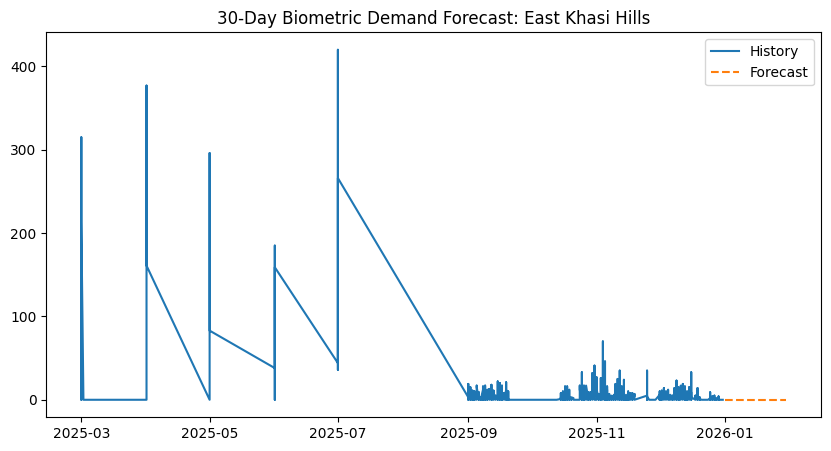

In [1]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.models.forecasting import predict_biometric_demand

processed_path = os.path.join("..", "data", "processed", "merged_master_table.csv")
df = pd.read_csv(processed_path)
df['date'] = pd.to_datetime(df['date'])

# Select a district for testing
sample_district = df['district'].iloc[0]
print(f"Forecasting for District: {sample_district}")

hist_data, forecast = predict_biometric_demand(df, sample_district, days_ahead=30)

if forecast is not None:
    display(forecast.head())
    
    # Simple Plot
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(hist_data['date'], hist_data['total_bio_updates'], label='History')
    plt.plot(forecast['date'], forecast['predicted_demand'], label='Forecast', linestyle='--')
    plt.legend()
    plt.title(f"30-Day Biometric Demand Forecast: {sample_district}")
    plt.show()
else:
    print("Insufficient data for forecasting.")